# alles wird nun graphisch dargestellt!
- das modell selbest -> graphiz (mit der dunkelheit der farbe wird betont wir gross das gewicht eines nodes ist)
- statistiken über den verlauf welcher den verlauf des errors darstellt und die konvergierende kurve gegen null
- die pixelbilder graphisch darstellen

In [67]:
import matplotlib.pyplot as plt

# graphiz
from graphviz import Digraph
from matplotlib import colors 
import numpy as np
import json

## Pixelbilder darstellen
- source = https://matplotlib.org/stable/tutorials/images.html 

In [68]:
# funktion um aus einer liste ein verschachtelte liste zu machen je nach dimensionen des pixelbildes
def format_pixels(pixelbild, dims):

    pixelbild_formatted = []

    # fehlermeldung falls das format und pixelbild nicht kompatibel sind!
    if dims[0]*dims[1]!=len(pixelbild):
        print("Das Format kann nicht af das pixelbild angewendet werden!") 
    
    else:
        for row in range(dims[0]):
            pixelbild_formatted.append(pixelbild[row*dims[1]:(row+1)*dims[1]])
        return pixelbild_formatted
    
# funktion um das pixelbild in einem raster darzustellen
def plot_pixels(pixelbild):
    n = len(pixelbild)
    m = len(pixelbild[0])

    plt.imshow(pixelbild)

    plt.xticks(range(n))  # X-Achsenbeschriftung
    plt.yticks(range(m))  # Y-Achsenbeschriftung

    # Vertikale Linien zwischen den Spalten zeichnen
    for i_n in range(1, n):  # Nicht bei 0, sondern ab 1 (zwischen den Spalten)
        plt.vlines(i_n - 0.5, -0.5, m - 0.5, colors="white", linewidth=1)

    # Horizontale Linien zwischen den Zeilen zeichnen (falls gewünscht)
    for i_m in range(1, m):
        plt.hlines(i_m - 0.5, -0.5, n - 0.5, colors="white", linewidth=1)

    plt.show()

[[1, 1, 1], [0, 0, 0], [0, 0, 0]]


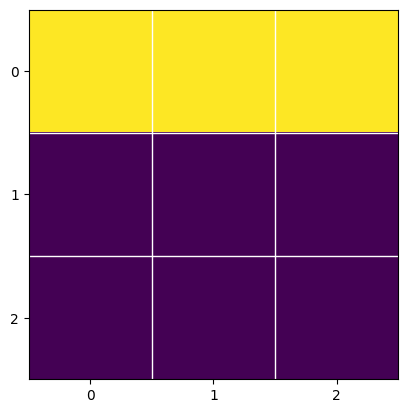

In [69]:
pixelbild_formatted = format_pixels([1, 1, 1, 0 ,0, 0, 0, 0, 0, ], [3,3])
print(pixelbild_formatted)

plot_pixels(pixelbild_formatted)

## mit graphiz das model mit den weights darstellen

In [70]:
# das netzwerk laden
file_path_nn = "../model/netzwerk.json"

with open(file_path_nn, "r") as file:
    netzwerk = json.load(file)

pixelbild = [1, 1, 1, 0, 0, 0, 1, 1, 1]

In [87]:
def number_to_color(number):
    """Converts a number to a grayscale color where:
       - Very low numbers → White (brightness = 1)
       - Zero → Gray (brightness = 0.5)
       - Very high numbers → Black (brightness = 0)
    """
    if number is None:
        return "white"
    
    # Use tanh for symmetric range (-inf to +inf → -1 to +1)
    # Then scale to brightness in [0,1], where:
    # tanh(-inf) → -1 → brightness = 1 (white)
    # tanh(0) → 0 → brightness = 0.5 (gray)
    # tanh(+inf) → +1 → brightness = 0 (black)
    brightness = 0.5 * (1 - np.tanh(number))
    
    # Apply same brightness to R, G, B
    rgb = (brightness, brightness, brightness)
    
    return colors.to_hex(rgb)

# Test cases
print("number_to_color(-100):", number_to_color(-100))  # white
print("number_to_color(0):", number_to_color(0))        # gray
print("number_to_color(100):", number_to_color(100))    # black

number_to_color(-100): #ffffff
number_to_color(0): #808080
number_to_color(100): #000000


9
1*0.18771184165442636
0.0 --> 1.0
0*0.45413455643394907
0.1 --> 1.0
0*0.06423269259188634
0.2 --> 1.0
1*0.6025409597534842
0.3 --> 1.0
0*-0.05067707357421172
0.4 --> 1.0
0*-0.00431191944833602
0.5 --> 1.0
1*0.030564794136891546
0.6 --> 1.0
0*0.018435695965041216
0.7 --> 1.0
0*0.4617780310761216
0.8 --> 1.0
9
1*0.5099427804507266
0.0 --> 1.1
0*-0.07484190227871385
0.1 --> 1.1
0*-0.22175275098637887
0.2 --> 1.1
1*0.366219724828899
0.3 --> 1.1
0*0.493752191652023
0.4 --> 1.1
0*0.4696423429940748
0.5 --> 1.1
1*-0.09406003111112432
0.6 --> 1.1
0*0.1179391159560294
0.7 --> 1.1
0*-0.416886366483465
0.8 --> 1.1
9
1*0.651661535597041
0.0 --> 1.2
0*0.27376678425120027
0.1 --> 1.2
0*0.1751878062529671
0.2 --> 1.2
1*0.04802664602165993
0.3 --> 1.2
0*0.5827050282860428
0.4 --> 1.2
0*0.599345121678309
0.5 --> 1.2
1*-0.20172562502017988
0.6 --> 1.2
0*-0.14314546638621395
0.7 --> 1.2
0*0.3070177994317399
0.8 --> 1.2
9
1*-0.04181124963644783
0.0 --> 1.3
0*0.2718500302004599
0.1 --> 1.3
0*0.0739517287

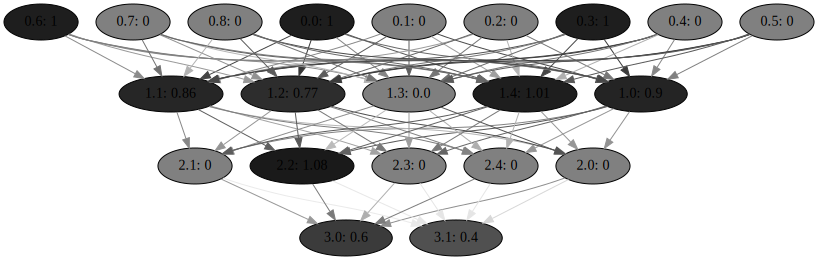

In [98]:
# aus dem netzwerk einen graphen erstellen
def generate_graph(netz, pixelbild):

    # instantiating object 
    dot = Digraph(comment='A NN') 

    # beim ersten layer die neuronen so enfärben wie die pixel eingefärbt sind (schwarz oder weiss)

    # folgendes auf jedes layer anwenden
    for index1, layer in enumerate(netz):
        prev_layer = netz[index1-1] # ein layer vorher um dann die actvations von von den vorherigen neuronen zu holen            

        # folgendes auf jedes neuron eines layers anwenden
        for index2, neuron in enumerate(layer):

            if index1 == 0:
                color_neuron = number_to_color(neuron["activation"]) # die farbe des neurons ist angepasst auf deren activation
            else:
                color_neuron = number_to_color(neuron["activation"]) # die farbe des neurons ist angepasst auf deren activation
            
            node_label = round(neuron["activation"], 2)

            prev_neurons = [neuron for neuron in prev_layer]
            dot.node(f"{index1}.{index2}", f"{index1}.{index2}: {node_label}", style="filled", fillcolor=color_neuron) # für jedes neuron einen node machen
            if neuron["weights"]:
                print(len(neuron["weights"]))

                # jeder pfeil eines neurons bestimmen
                for index3, edge in enumerate(neuron["weights"]): # nicht für das inputlayer!

                    weight = edge

                    if index1 == 0:
                        color_weight = "#000000" # die farbe des neurons ist angepasst auf deren activation
                    else:
                        color_weight = number_to_color(weight) # die farbe des neurons ist angepasst auf deren activation

                    prev_activation = prev_neurons[index3]["activation"]
                    edge_label = f"{prev_activation}*{edge}"
                    print(edge_label)
                    dot.edge(f"{index1-1}.{index3}", f"{index1}.{index2}", color=color_weight)
                    print(f"{index1-1}.{index3} --> {index1}.{index2}")

    # drawing the graph
    return dot

generate_graph(netzwerk, pixelbild)

1*0.19
0.0 --> 1.0
0*0.45
0.1 --> 1.0
0*0.06
0.2 --> 1.0
1*0.6
0.3 --> 1.0
0*-0.05
0.4 --> 1.0
0*-0.0
0.5 --> 1.0
1*0.03
0.6 --> 1.0
0*0.02
0.7 --> 1.0
0*0.46
0.8 --> 1.0
1*0.51
0.0 --> 1.1
0*-0.07
0.1 --> 1.1
0*-0.22
0.2 --> 1.1
1*0.37
0.3 --> 1.1
0*0.49
0.4 --> 1.1
0*0.47
0.5 --> 1.1
1*-0.09
0.6 --> 1.1
0*0.12
0.7 --> 1.1
0*-0.42
0.8 --> 1.1
1*0.65
0.0 --> 1.2
0*0.27
0.1 --> 1.2
0*0.18
0.2 --> 1.2
1*0.05
0.3 --> 1.2
0*0.58
0.4 --> 1.2
0*0.6
0.5 --> 1.2
1*-0.2
0.6 --> 1.2
0*-0.14
0.7 --> 1.2
0*0.31
0.8 --> 1.2
1*-0.04
0.0 --> 1.3
0*0.27
0.1 --> 1.3
0*0.07
0.2 --> 1.3
1*0.15
0.3 --> 1.3
0*0.08
0.4 --> 1.3
0*0.31
0.5 --> 1.3
1*-0.1
0.6 --> 1.3
0*-0.44
0.7 --> 1.3
0*0.11
0.8 --> 1.3
1*0.32
0.0 --> 1.4
0*-0.26
0.1 --> 1.4
0*-0.44
0.2 --> 1.4
1*0.5
0.3 --> 1.4
0*-0.39
0.4 --> 1.4
0*0.32
0.5 --> 1.4
1*0.01
0.6 --> 1.4
0*0.24
0.7 --> 1.4
0*0.19
0.8 --> 1.4
0.9*-0.14
1.0 --> 2.0
0.86*-0.46
1.1 --> 2.0
0.77*0.43
1.2 --> 2.0
0.0*0.35
1.3 --> 2.0
1.01*-0.18
1.4 --> 2.0
0.9*-0.02
1.0 --> 2.1
0.86

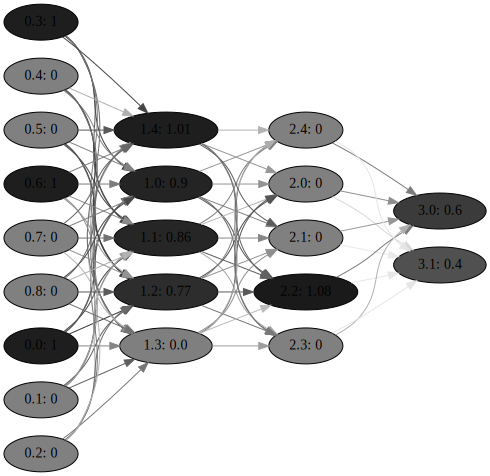

In [99]:
# with the corrdct ranking of the nodes
def generate_graph(netz, pixelbild):
    dot = Digraph(comment='A NN')
    dot.attr(rankdir='LR')  # Left to right (horizontal layers)

    for index1, layer in enumerate(netz):
        if index1 > 0:
            prev_layer = netz[index1 - 1]

        # Group nodes of the same layer on the same rank
        with dot.subgraph() as s:
            s.attr(rank='same')
            for index2, neuron in enumerate(layer):
                color_neuron = number_to_color(neuron["activation"])
                node_label = round(neuron["activation"], 2)
                node_name = f"{index1}.{index2}"
                s.node(node_name, f"{node_name}: {node_label}", style="filled", fillcolor=color_neuron)

        # Add edges only for non-input layers
        if index1 > 0:
            for index2, neuron in enumerate(layer):
                if neuron.get("weights"):
                    for index3, weight in enumerate(neuron["weights"]):
                        color_weight = number_to_color(weight)
                        prev_activation = prev_layer[index3]["activation"]
                        edge_label = f"{round(prev_activation, 2)}*{round(weight, 2)}"
                        print(edge_label)
                        dot.edge(f"{index1-1}.{index3}", f"{index1}.{index2}", color=color_weight)
                        print(f"{index1-1}.{index3} --> {index1}.{index2}")

    return dot

generate_graph(netzwerk, pixelbild)

1*0.19
0.0 --> 1.0
0*0.45
0.1 --> 1.0
0*0.06
0.2 --> 1.0
1*0.6
0.3 --> 1.0
0*-0.05
0.4 --> 1.0
0*-0.0
0.5 --> 1.0
1*0.03
0.6 --> 1.0
0*0.02
0.7 --> 1.0
0*0.46
0.8 --> 1.0
1*0.51
0.0 --> 1.1
0*-0.07
0.1 --> 1.1
0*-0.22
0.2 --> 1.1
1*0.37
0.3 --> 1.1
0*0.49
0.4 --> 1.1
0*0.47
0.5 --> 1.1
1*-0.09
0.6 --> 1.1
0*0.12
0.7 --> 1.1
0*-0.42
0.8 --> 1.1
1*0.65
0.0 --> 1.2
0*0.27
0.1 --> 1.2
0*0.18
0.2 --> 1.2
1*0.05
0.3 --> 1.2
0*0.58
0.4 --> 1.2
0*0.6
0.5 --> 1.2
1*-0.2
0.6 --> 1.2
0*-0.14
0.7 --> 1.2
0*0.31
0.8 --> 1.2
1*-0.04
0.0 --> 1.3
0*0.27
0.1 --> 1.3
0*0.07
0.2 --> 1.3
1*0.15
0.3 --> 1.3
0*0.08
0.4 --> 1.3
0*0.31
0.5 --> 1.3
1*-0.1
0.6 --> 1.3
0*-0.44
0.7 --> 1.3
0*0.11
0.8 --> 1.3
1*0.32
0.0 --> 1.4
0*-0.26
0.1 --> 1.4
0*-0.44
0.2 --> 1.4
1*0.5
0.3 --> 1.4
0*-0.39
0.4 --> 1.4
0*0.32
0.5 --> 1.4
1*0.01
0.6 --> 1.4
0*0.24
0.7 --> 1.4
0*0.19
0.8 --> 1.4
0.9*-0.14
1.0 --> 2.0
0.86*-0.46
1.1 --> 2.0
0.77*0.43
1.2 --> 2.0
0.0*0.35
1.3 --> 2.0
1.01*-0.18
1.4 --> 2.0
0.9*-0.02
1.0 --> 2.1
0.86

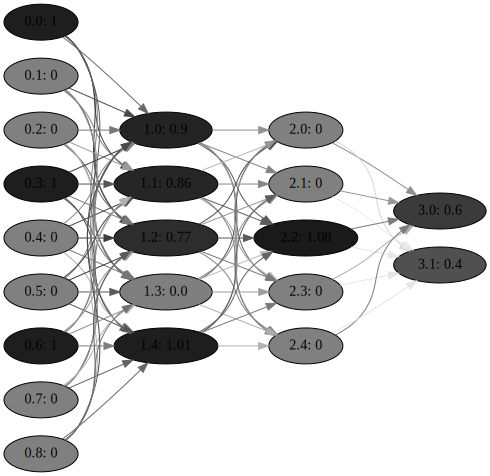

In [100]:
def generate_graph(netz, pixelbild):
    dot = Digraph(comment='A NN')
    dot.attr(rankdir='LR')  # Left to right

    for index1, layer in enumerate(netz):
        if index1 > 0:
            prev_layer = netz[index1 - 1]

        # Group same-layer nodes on the same rank
        with dot.subgraph() as s:
            s.attr(rank='same')
            for index2, neuron in enumerate(layer):
                color_neuron = number_to_color(neuron["activation"])
                node_label = round(neuron["activation"], 2)
                node_name = f"{index1}.{index2}"
                s.node(node_name, f"{node_name}: {node_label}", style="filled", fillcolor=color_neuron)

        # Enforce left-to-right node order within the layer
        for i in range(len(layer) - 1):
            dot.edge(f"{index1}.{i}", f"{index1}.{i+1}", style='invis')

        # Draw connections between layers
        if index1 > 0:
            for index2, neuron in enumerate(layer):
                if neuron.get("weights"):
                    for index3, weight in enumerate(neuron["weights"]):
                        color_weight = number_to_color(weight)
                        prev_activation = prev_layer[index3]["activation"]
                        edge_label = f"{round(prev_activation, 2)}*{round(weight, 2)}"
                        print(edge_label)
                        dot.edge(f"{index1-1}.{index3}", f"{index1}.{index2}", color=color_weight)
                        print(f"{index1-1}.{index3} --> {index1}.{index2}")

    return dot

generate_graph(netzwerk, pixelbild)